In [3]:
import pandas as pd
df = pd.read_csv('tweet_data_analysis.csv', header=0, index_col=False)

In [4]:
df_unreliable = df.loc[df['unreliable'] > 0]
df_unreliable = df_unreliable.loc[df_unreliable['retweets'] > 0]

In [5]:
# randomly select 100 handles from df_unreliable
df_unreliable = df_unreliable.sample(n = 100)
df_unreliable = df_unreliable.reset_index(drop=True)

In [46]:
# prep for tweet scraping: remove '@' from tweet handles
twt_handle = []
for i in range(len(df_unreliable['handle'])):
    twt_handle.append(df_unreliable['handle'][i].replace('@', ''))
    i += 1

In [47]:
df_unreliable['handle'] = twt_handle

In [49]:
un_df = pd.DataFrame()
un_df = pd.DataFrame(columns=['source', 'retweet_by'])

In [50]:
import tweepy
import time

#insert your Twitter keys here
consumer_key ='jOCRk5krzbIuz05yioCXdkTro'
consumer_secret='Zu9NW0iR8bUDfrbqacM0EYMqjsfcdceXbq02jAU638QWi8Na0c'
access_token='1241943966771109890-kOgLOjo8sJxNTHCyFhJesZQFBsr7q3'
access_token_secret='dvouHblWvQGZFSu541BjMPhakb54dAEJKAQToFV4lY8Ri'

auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

if(api.verify_credentials):
    print ('We successfully logged in')

i = 0
for i in range(len(df_unreliable['handle'])):
    name = df_unreliable['handle'][i]
    t = df_unreliable['retweets'][i]
    try:
        user = tweepy.Cursor(api.followers, screen_name=name).items(t)
        for un in user:
            print(name +'\t'+ un.screen_name)
            s = pd.Series([name,un.screen_name], index=['source','retweet_by'])
            un_df = un_df.append(s, ignore_index=True)
            #f.write(name +'\t'+ un.screen_name +' \n')
    except tweepy.TweepError as e: 
        #import ipdb; ipdb.set_trace()
        if 'Rate limit exceeded' in e.reason:
            print('reach rate limit, sleep for 15 minutes')
            time.sleep(15*60)
            user = tweepy.Cursor(api.followers, screen_name=name).items(t)
            for un in user:
                print(name +'\t'+ un.screen_name)
                s = pd.Series([name,un.screen_name], index=['source','retweet_by'])
                un_df = un_df.append(s, ignore_index=True)
                #f.write(name +'\t'+ un.screen_name +' \n')
        else:
            print(e.reason)
            pass
    i += 1

We successfully logged in
RockZen	Freebir97317919
michel_estefan	mariekeriethof
EricBeinhocker	MAlperDincer
EricBeinhocker	J_R_Klinkenberg
EricBeinhocker	ResJEconomics
EricBeinhocker	JP_JamesPerrott
EricBeinhocker	Hackney4the11th
EricBeinhocker	niallmcdonald82
EricBeinhocker	paulbugala
EricBeinhocker	WLevestone
EricBeinhocker	jiangyi93048308
EricBeinhocker	FridaBergmans
EricBeinhocker	jayhancock1
EricBeinhocker	fredericacosta_
EricBeinhocker	Enzo98735941
EricBeinhocker	MarkSimriNapier
EricBeinhocker	RKosmonauta
EricBeinhocker	Legumendoas
EricBeinhocker	kwaters126
EricBeinhocker	PaulClaireaux
EricBeinhocker	RosyGuajardoV
EricBeinhocker	Wasbeer4
_Sankara	oruzibiza
RepDonBeyer	Tuchankasaurus
RepDonBeyer	dfriedman33
RepDonBeyer	Paulkiptoo16
RepDonBeyer	declanb21
Piloc_Doc	wewillstand_
Piloc_Doc	LeCelianne
Piloc_Doc	AlRedux
charlesjaco1	DMHam5
charlesjaco1	DawnOLeary
reach rate limit, sleep for 15 minutes
0TreWayEen7	drinkyoghurt2
MrHanafii	ChecChristine
MrHanafii	DipeeItsMe
markgamsu	Sheff

ReutersGraphics	LauraRa71416780
ReutersGraphics	hassan_fiyaz
ReutersGraphics	Myoyeon
ReutersGraphics	vokimquy
ReutersGraphics	jhonatassimiao
ReutersGraphics	mai_mikano
ReutersGraphics	RAJESHY70624681
ReutersGraphics	siomay_babi
ReutersGraphics	PaperCh74552422
ReutersGraphics	rabar25
ReutersGraphics	JeanNepo7
ReutersGraphics	gnumpfo
ReutersGraphics	LucVR2
ReutersGraphics	yong_lx
ReutersGraphics	khadedji
ReutersGraphics	MarkusK65390063
ReutersGraphics	ivan_lord
ReutersGraphics	exwhyzeddd
ReutersGraphics	Mai_laapataa
ReutersGraphics	OreoluwaOlarew4
ReutersGraphics	olicallaghan
ReutersGraphics	majojojo14
ReutersGraphics	lhcs93
ReutersGraphics	CostelloJT
ReutersGraphics	SAbudarham
ReutersGraphics	art_tis_tic_D
ReutersGraphics	myfavbluehoodie
ReutersGraphics	KirbyVeneco
ReutersGraphics	ali_aslan79
ReutersGraphics	tguphdbusecon
ReutersGraphics	Papadog14978733
ReutersGraphics	cdesign87
ReutersGraphics	epicondyle15
ReutersGraphics	Ritzy
ReutersGraphics	Data_Scratch
ReutersGraphics	SoldierofTrut

In [52]:
un_df.to_csv('political_network_data.csv', index=False)

**do the same above to scrape data for 'conspiracy' (co_df), 'clickbait' (cl_df), 'political' (po_df)**

In [ ]:
new_df = un_df.append(co_df)
new_df = new_df.append(cl_df)
new_df = new_df.append(po_df)

In [66]:
twt_handle = []
for i in range(len(df['handle'])):
    twt_handle.append(df['handle'][i].replace('@', ''))
    i += 1

In [67]:
df['handle'] = twt_handle

In [68]:
new_df.columns = ['handle', 'retweet_by']
new_df = pd.merge(new_df, df, on='handle', how='inner')
new_df

,handle,retweet_by,name,tweet,replies,retweets,fav,timestamp,date,url,...,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,RockZen,Freebir97317919,raffaele zenti,Trump vuole ‘Riaprire l’America.’ Ecco cosa su...,1,1,9,1.585394e+12,2020-03-28,RockZen/status/1243856760768811009,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.023256,0.023256,0.000000
1,michel_estefan,mariekeriethof,Michel Estefan,1/2 This article has the best visual represent...,1,1,3,1.584507e+12,2020-03-18,michel_estefan/status/1240139358239363073,...,0.000000,0.044444,0.000000,0.000000,0.022222,0.000000,0.044444,0.000000,0.022222,0.022222
2,EricBeinhocker,MAlperDincer,Eric Beinhocker,So here’s an idea: Red states you go ahead and...,39,12,20,1.585217e+12,2020-03-26,EricBeinhocker/status/1243114228405407754,...,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.042553,0.021277,0.021277,0.021277
3,EricBeinhocker,MAlperDincer,Eric Beinhocker,“It is a false choice to say that we must acce...,2,20,34,1.585215e+12,2020-03-26,EricBeinhocker/status/1243109997183107074,...,0.022727,0.022727,0.022727,0.022727,0.000000,0.045455,0.022727,0.022727,0.022727,0.022727
4,EricBeinhocker,J_R_Klinkenberg,Eric Beinhocker,So here’s an idea: Red states you go ahead and...,39,12,20,1.585217e+12,2020-03-26,EricBeinhocker/status/1243114228405407754,...,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.042553,0.021277,0.021277,0.021277
5,EricBeinhocker,J_R_Klinkenberg,Eric Beinhocker,“It is a false choice to say that we must acce...,2,20,34,1.585215e+12,2020-03-26,EricBeinhocker/status/1243109997183107074,...,0.022727,0.022727,0.022727,0.022727,0.000000,0.045455,0.022727,0.022727,0.022727,0.022727
6,EricBeinhocker,ResJEconomics,Eric Beinhocker,So here’s an idea: Red states you go ahead and...,39,12,20,1.585217e+12,2020-03-26,EricBeinhocker/status/1243114228405407754,...,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.042553,0.021277,0.021277,0.021277
7,EricBeinhocker,ResJEconomics,Eric Beinhocker,“It is a false choice to say that we must acce...,2,20,34,1.585215e+12,2020-03-26,EricBeinhocker/status/1243109997183107074,...,0.022727,0.022727,0.022727,0.022727,0.000000,0.045455,0.022727,0.022727,0.022727,0.022727
8,EricBeinhocker,JP_JamesPerrott,Eric Beinhocker,So here’s an idea: Red states you go ahead and...,39,12,20,1.585217e+12,2020-03-26,EricBeinhocker/status/1243114228405407754,...,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.042553,0.021277,0.021277,0.021277
9,EricBeinhocker,JP_JamesPerrott,Eric Beinhocker,“It is a false choice to say that we must acce...,2,20,34,1.585215e+12,2020-03-26,EricBeinhocker/status/1243109997183107074,...,0.022727,0.022727,0.022727,0.022727,0.000000,0.045455,0.022727,0.022727,0.022727,0.022727


In [95]:
len(new_df)

3672

In [173]:
import networkx as nx

#create network class G
G=nx.from_pandas_edgelist(new_df, 'handle', 'retweet_by')

In [174]:
print('total nodes: ' + str(len(G.nodes())))
print(G.nodes())

total nodes: 888
['RockZen', 'Freebir97317919', 'michel_estefan', 'mariekeriethof', 'EricBeinhocker', 'MAlperDincer', 'J_R_Klinkenberg', 'ResJEconomics', 'JP_JamesPerrott', 'Hackney4the11th', 'niallmcdonald82', 'paulbugala', 'WLevestone', 'jiangyi93048308', 'FridaBergmans', 'jayhancock1', 'fredericacosta_', 'Enzo98735941', 'MarkSimriNapier', 'RKosmonauta', 'Legumendoas', 'kwaters126', 'PaulClaireaux', 'RosyGuajardoV', 'Wasbeer4', '_Sankara', 'oruzibiza', 'RepDonBeyer', 'Tuchankasaurus', 'dfriedman33', 'Paulkiptoo16', 'declanb21', 'Piloc_Doc', 'wewillstand_', 'LeCelianne', 'AlRedux', 'charlesjaco1', 'DMHam5', 'DawnOLeary', '0TreWayEen7', 'drinkyoghurt2', 'MrHanafii', 'ChecChristine', 'DipeeItsMe', 'markgamsu', 'SheffieldAdvice', 'LaurenMP24', 'JaneinBarnsley', 'amydunne82', 'EricAnt62405670', 'ClareHWalton', 'RogerTuckett', 'EricTopol', 'TimoVeb', 'ludde', 'jpdeol', 'BethrandTumi', 'suyang921207', 'jondinn', 'JesHansenTM', 'Hamid_446', 'mgoodmanatx', 'daveadeoyin', 'edream1996', 'sanjay

In [175]:
# remove self loops
loops = list(G.selfloop_edges())
G.remove_edges_from(loops)
print(loops)

In [152]:
# relabel nodes
mapping = {node: node.title() for node in G if isinstance(node, str)}
nx.relabel_nodes(G, mapping, copy=False)

In [176]:
attributes = new_df.columns.tolist()
index = attributes.index('unreliable')
attributes = attributes[index:]
attributes

['unreliable',
 'conspiracy',
 'clickbait',
 'political',
 'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'negative',
 'positive',
 'sadness',
 'surprise',
 'trust']

In [154]:
# add attributes to node
for a in attributes:
    temp = new_df.loc[new_df[a] > 0]
    column_values = temp_df[['handle', 'retweet_by']].values.ravel()
    unique_values =  pd.unique(column_values)
    temp_set = set(unique_values)
    temp_dict = {node: (node in temp_set) for node in G}
    nx.set_node_attributes(G, temp_dict, a)

In [183]:
temp_df = new_df.loc[new_df['political'] > 0]
column_values = temp_df[['handle', 'retweet_by']].values.ravel()
unique_values =  pd.unique(column_values)
temp_set = set(unique_values)
temp_dict = {node: (node in temp_set) for node in G}
nx.set_node_attributes(G, temp_dict, 'political')

In [184]:
print(G.nodes(data=True))

[('RockZen', {'unreliable': True, 'conspiracy': False, 'clickbait': False, 'political': False}), ('Freebir97317919', {'unreliable': True, 'conspiracy': False, 'clickbait': False, 'political': False}), ('michel_estefan', {'unreliable': True, 'conspiracy': True, 'clickbait': False, 'political': False}), ('mariekeriethof', {'unreliable': True, 'conspiracy': True, 'clickbait': False, 'political': False}), ('EricBeinhocker', {'unreliable': True, 'conspiracy': False, 'clickbait': True, 'political': True}), ('MAlperDincer', {'unreliable': True, 'conspiracy': False, 'clickbait': True, 'political': True}), ('J_R_Klinkenberg', {'unreliable': True, 'conspiracy': False, 'clickbait': True, 'political': True}), ('ResJEconomics', {'unreliable': True, 'conspiracy': False, 'clickbait': True, 'political': True}), ('JP_JamesPerrott', {'unreliable': True, 'conspiracy': False, 'clickbait': True, 'political': True}), ('Hackney4the11th', {'unreliable': True, 'conspiracy': False, 'clickbait': True, 'political

In [212]:
colors = ["yellow" if n[1]["unreliable"] else
              ("red" if n[1]["conspiracy"] else
                  ("green" if n[1]["clickbait"] else
                      ("blue" if n[1]["political"] else
                          "grey"))) for n in G.nodes(data=True)]

In [213]:
# dzcnapy_plotlib available at https://pragprog.com/titles/dzcnapy/source_code
import dzcnapy_plotlib as dzcnapy
dzcnapy.small_attrs["node_color"] = colors

/Users/angelhwang/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


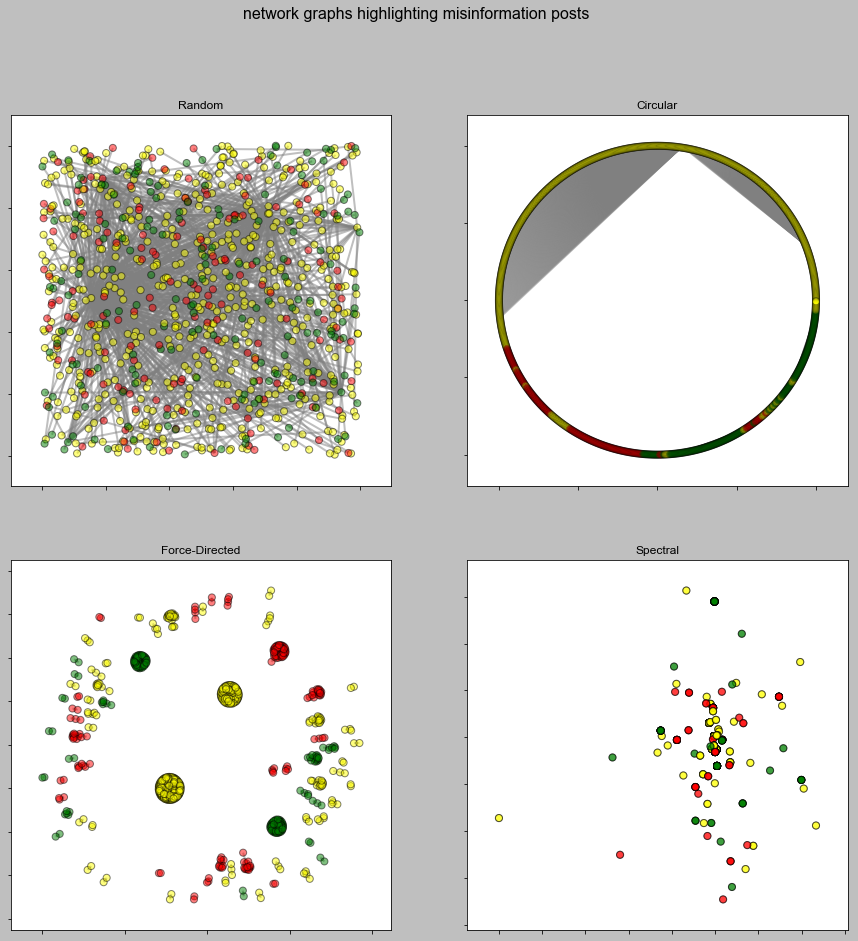

In [216]:
fig, plot = plt.subplots(2,2, figsize=(15,15))

subplots = plot.reshape(1,4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ('Random', 'Circular', 'Force-Directed', 'Spectral')

fig.suptitle('network graphs highlighting misinformation posts', fontsize=16)

for plot, layout , title in zip(subplots, layouts, titles):
    pos = layout(G)
    #nx.draw_networkx_nodes(G, with_labels=False, pos=layout(G), node_color='b', node_size=10, alpha=0.7)
    #nx.draw_networkx_edges(G, pos=layout(G), width=2, alpha=0.5, edge_color='grey')
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False, alpha=0.5, **dzcnapy.small_attrs)

    plot.set_title(title)
    dzcnapy.set_extent(pos,plot)

In [82]:
import matplotlib.pyplot as plt

In [192]:
colors = ["orange" if n[1]["unreliable"] else "grey" for n in G.nodes(data=True)]

In [193]:
# dzcnapy_plotlib available at https://pragprog.com/titles/dzcnapy/source_code
import dzcnapy_plotlib as dzcnapy
dzcnapy.small_attrs["node_color"] = colors

/Users/angelhwang/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


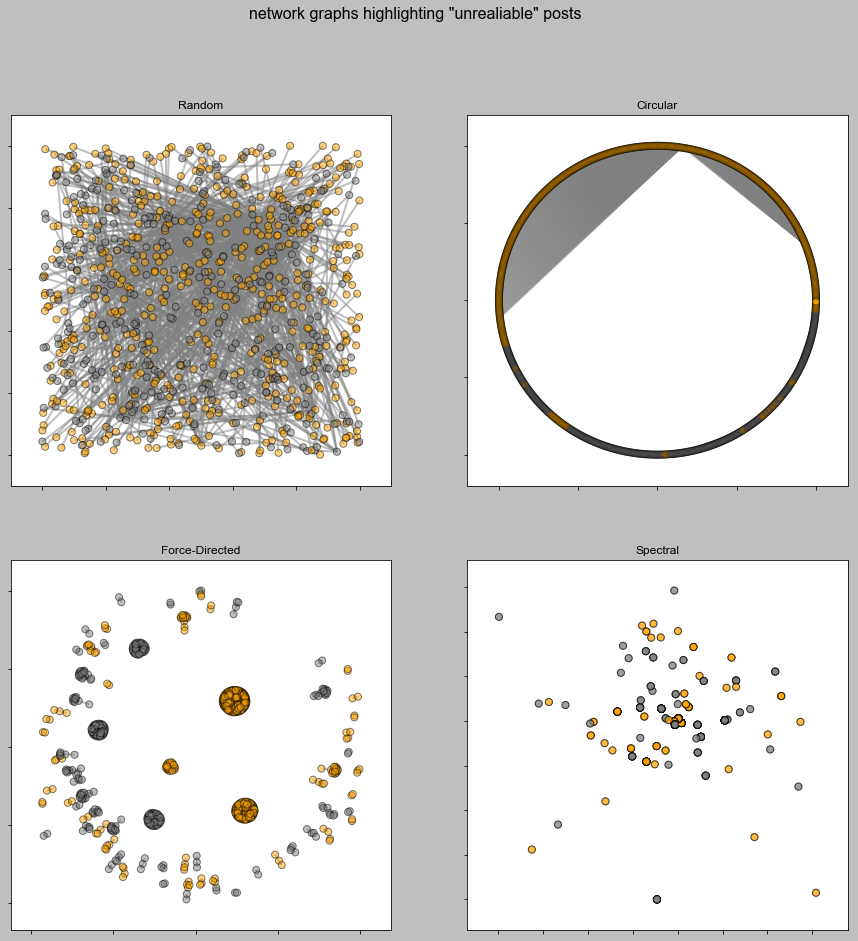

In [199]:
# network visualization for "unreliable" tweets
fig, plot = plt.subplots(2,2, figsize=(15,15))

subplots = plot.reshape(1,4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ('Random', 'Circular', 'Force-Directed', 'Spectral')

fig.suptitle('network graphs highlighting "unrealiable" posts', fontsize=16)

for plot, layout , title in zip(subplots, layouts, titles):
    pos = layout(G)
    #nx.draw_networkx_nodes(G, with_labels=False, pos=layout(G), node_color='b', node_size=10, alpha=0.7)
    #nx.draw_networkx_edges(G, pos=layout(G), width=2, alpha=0.5, edge_color='grey')
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False, alpha=0.5, **dzcnapy.small_attrs)

    plot.set_title(title)
    dzcnapy.set_extent(pos,plot)

In [200]:
colors = ["yellow" if n[1]["conspiracy"] else "grey" for n in G.nodes(data=True)]

In [201]:
# dzcnapy_plotlib available at https://pragprog.com/titles/dzcnapy/source_code
import dzcnapy_plotlib as dzcnapy
dzcnapy.small_attrs["node_color"] = colors

/Users/angelhwang/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


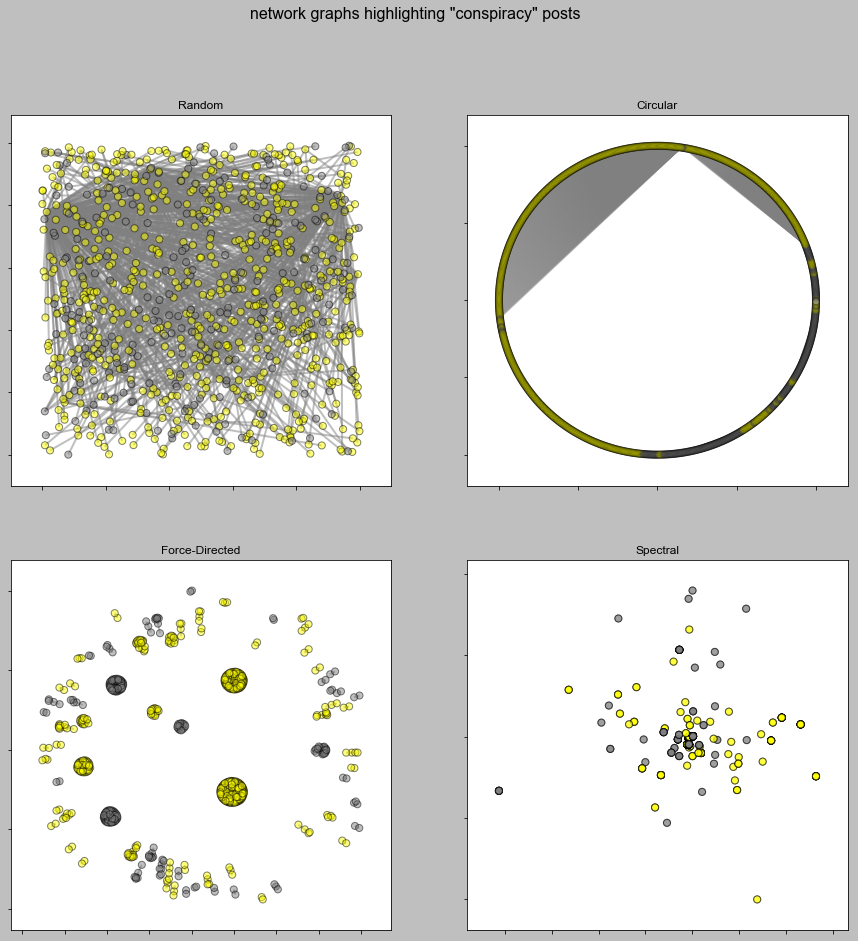

In [202]:
# network visualization for "conspiracy" tweets
fig, plot = plt.subplots(2,2, figsize=(15,15))

subplots = plot.reshape(1,4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ('Random', 'Circular', 'Force-Directed', 'Spectral')

fig.suptitle('network graphs highlighting "conspiracy" posts', fontsize=16)

for plot, layout , title in zip(subplots, layouts, titles):
    pos = layout(G)
    #nx.draw_networkx_nodes(G, with_labels=False, pos=layout(G), node_color='b', node_size=10, alpha=0.7)
    #nx.draw_networkx_edges(G, pos=layout(G), width=2, alpha=0.5, edge_color='grey')
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False, alpha=0.5, **dzcnapy.small_attrs)

    plot.set_title(title)
    dzcnapy.set_extent(pos,plot)

In [203]:
colors = ["green" if n[1]["clickbait"] else "grey" for n in G.nodes(data=True)]

In [204]:
# dzcnapy_plotlib available at https://pragprog.com/titles/dzcnapy/source_code
import dzcnapy_plotlib as dzcnapy
dzcnapy.small_attrs["node_color"] = colors

/Users/angelhwang/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


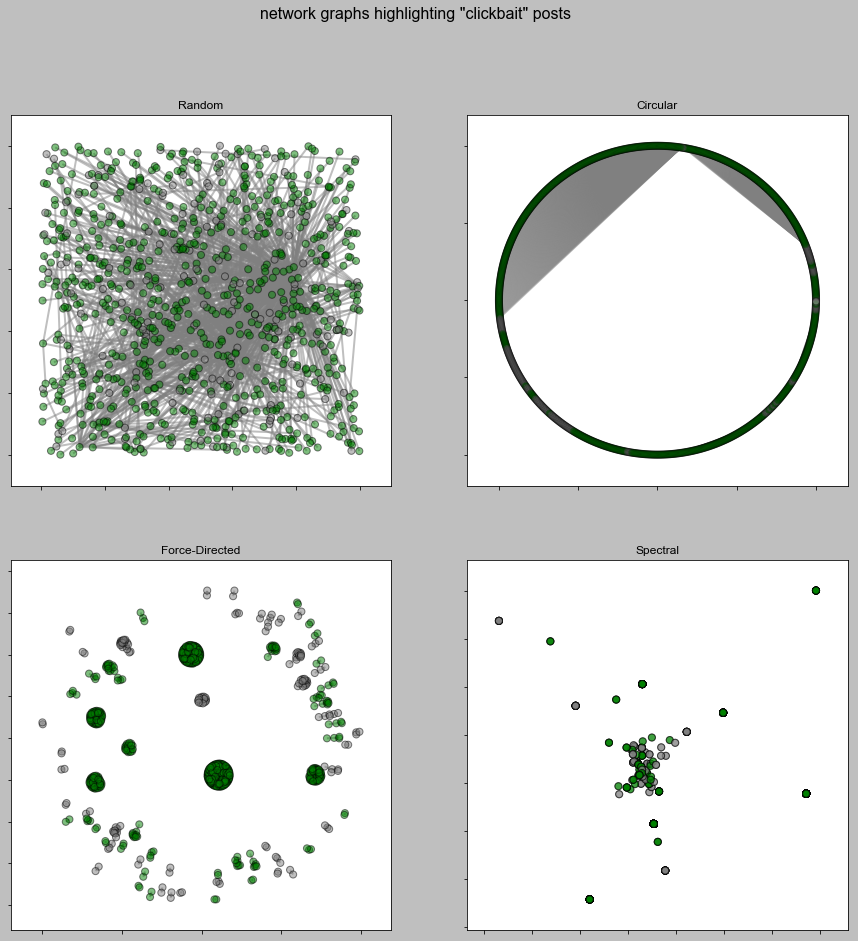

In [205]:
# network visualization for "clickbait" tweets
fig, plot = plt.subplots(2,2, figsize=(15,15))

subplots = plot.reshape(1,4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ('Random', 'Circular', 'Force-Directed', 'Spectral')

fig.suptitle('network graphs highlighting "clickbait" posts', fontsize=16)

for plot, layout , title in zip(subplots, layouts, titles):
    pos = layout(G)
    #nx.draw_networkx_nodes(G, with_labels=False, pos=layout(G), node_color='b', node_size=10, alpha=0.7)
    #nx.draw_networkx_edges(G, pos=layout(G), width=2, alpha=0.5, edge_color='grey')
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False, alpha=0.5, **dzcnapy.small_attrs)

    plot.set_title(title)
    dzcnapy.set_extent(pos,plot)

In [206]:
colors = ["blue" if n[1]["political"] else "grey" for n in G.nodes(data=True)]

In [207]:
# dzcnapy_plotlib available at https://pragprog.com/titles/dzcnapy/source_code
import dzcnapy_plotlib as dzcnapy
dzcnapy.small_attrs["node_color"] = colors

/Users/angelhwang/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


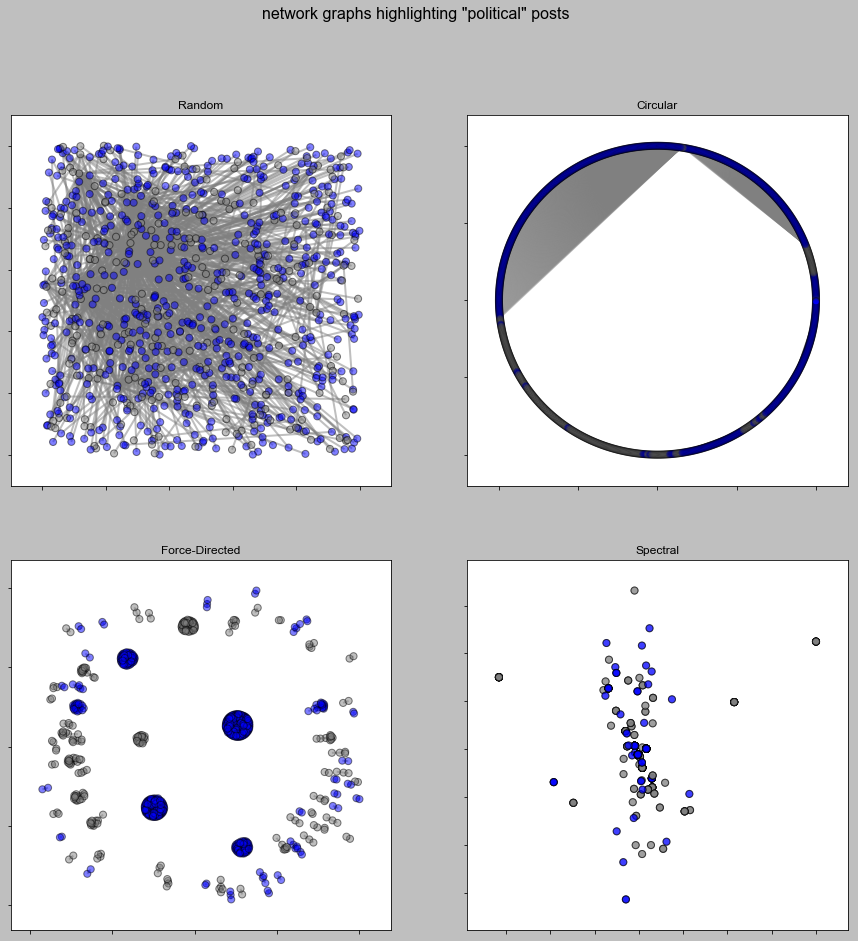

In [208]:
# network visualization for "political" tweets
fig, plot = plt.subplots(2,2, figsize=(15,15))

subplots = plot.reshape(1,4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ('Random', 'Circular', 'Force-Directed', 'Spectral')

fig.suptitle('network graphs highlighting "political" posts', fontsize=16)

for plot, layout , title in zip(subplots, layouts, titles):
    pos = layout(G)
    #nx.draw_networkx_nodes(G, with_labels=False, pos=layout(G), node_color='b', node_size=10, alpha=0.7)
    #nx.draw_networkx_edges(G, pos=layout(G), width=2, alpha=0.5, edge_color='grey')
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False, alpha=0.5, **dzcnapy.small_attrs)

    plot.set_title(title)
    dzcnapy.set_extent(pos,plot)